# Lab 13

In [76]:
import pandas as p_diddy
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = p_diddy.read_csv("WMT.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,11.125000,11.687500,11.062500,11.625000,7.589142,7883000
1,1996-01-03,11.562500,11.937500,11.562500,11.750000,7.670743,10121000
2,1996-01-04,11.812500,12.062500,11.750000,11.875000,7.752344,8230600
3,1996-01-05,11.687500,11.875000,11.687500,11.687500,7.629940,5071000
4,1996-01-08,11.562500,11.750000,11.500000,11.687500,7.629940,2161600
...,...,...,...,...,...,...,...
6186,2020-07-29,131.559998,131.860001,129.850006,130.690002,130.690002,4741100
6187,2020-07-30,129.419998,130.419998,128.720001,130.119995,130.119995,4596100
6188,2020-07-31,129.649994,130.089996,127.620003,129.399994,129.399994,7211500
6189,2020-08-03,129.910004,130.119995,128.270004,129.300003,129.300003,4990500


NaN

In [7]:
dt_strings = np.array(['04-03-2019 12:35 PM',
                       '22-06-2017 11:01 AM',
                       '05-09-2009 07:09 PM'])

timestamps = [p_diddy.to_datetime(date, format ="%d-%m-%Y %I:%M %p",
                errors ="coerce") for date in dt_strings]
timestamps

[Timestamp('2019-03-04 12:35:00'),
 Timestamp('2017-06-22 11:01:00'),
 Timestamp('2009-09-05 19:09:00')]

## Accounting for missig values
we interpolate between know points to find the missing values

In [159]:
data = p_diddy.read_csv("WMT.csv")

# Convert the 'date' column to datetime
data['Date'] = p_diddy.to_datetime(data['Date'])

# Set 'date' as the index
data.set_index('Date', inplace=True)

# Create a complete date range
date_range = p_diddy.date_range(start=data.index.min(), end=data.index.max())

# Reindex the DataFrame to include all dates
data_full = data.reindex(date_range)

data_full.interpolate('linear', inplace=True)
data_full

,Open,High,Low,Close,Adj Close,Volume
1996-01-02,11.125000,11.687500,11.062500,11.625000,7.589142,7.883000e+06
1996-01-03,11.562500,11.937500,11.562500,11.750000,7.670743,1.012100e+07
1996-01-04,11.812500,12.062500,11.750000,11.875000,7.752344,8.230600e+06
1996-01-05,11.687500,11.875000,11.687500,11.687500,7.629940,5.071000e+06
1996-01-06,11.645833,11.833333,11.625000,11.687500,7.629940,4.101200e+06
...,...,...,...,...,...,...
2020-07-31,129.649994,130.089996,127.620003,129.399994,129.399994,7.211500e+06
2020-08-01,129.736664,130.099996,127.836670,129.366664,129.366664,6.471167e+06
2020-08-02,129.823334,130.109995,128.053337,129.333333,129.333333,5.730833e+06
2020-08-03,129.910004,130.119995,128.270004,129.300003,129.300003,4.990500e+06


# Normilizing

exponetial and linear regression

𝑦=𝑎𝑒^(𝑏𝑥)⟹ln(𝑦)=ln(𝑎)+𝑏𝑥

because we can take the natural logarithm of both sides. This creates a linear equation 𝑓(𝑥)=𝑚𝑥+𝑐 where:

𝑓(𝑥)=ln(𝑦)
𝑚=𝑏
𝑐=ln(𝑎)

In [160]:
x_arr = data_full.index.values.astype(np.int64)

b, c = np.polyfit(x_arr, np.log(data_full["Close"]), 1)
a = np.exp(c)

a_lin, b_lin = np.polyfit(x_arr, data_full["Close"], 1)

(nan, nan)

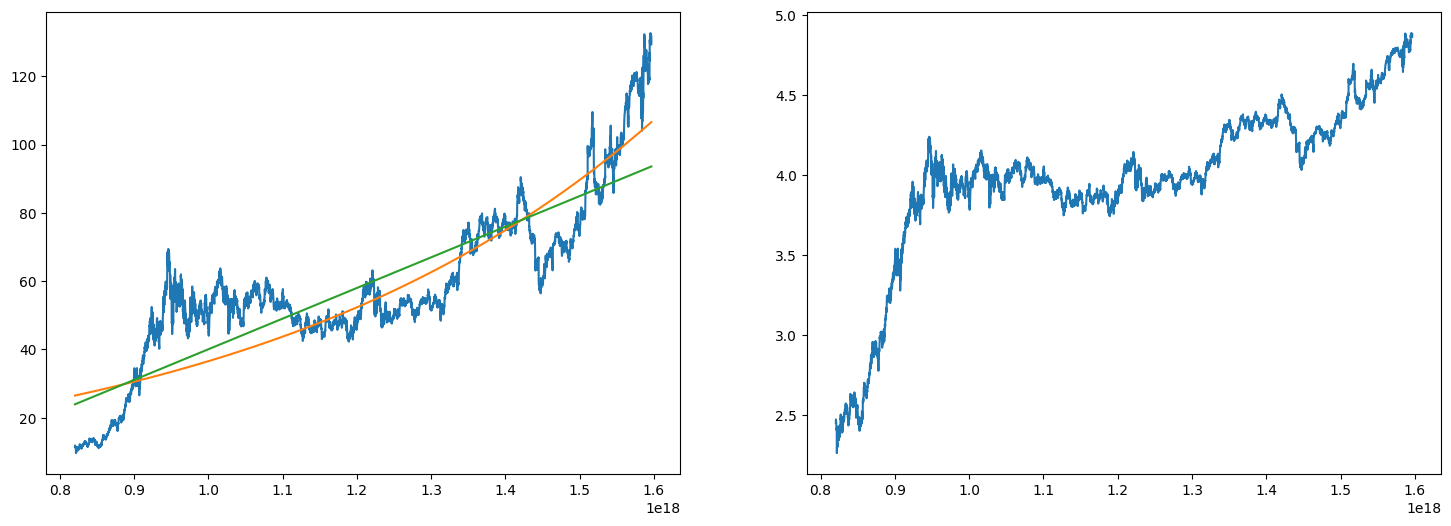

In [165]:
fitted = lambda x: a * np.exp(b * x)
fitted_data = fitted(x_arr)

fitted_lin = lambda x: b_lin + a_lin *x
fitted_data_lin = fitted_lin(x_arr)

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(x_arr, data_full["Close"])
plt.plot(x_arr, fitted_data)
plt.plot(x_arr, fitted_data_lin)


log_data = np.log(data_full["Close"])

plt.subplot(1, 2, 2)
plt.plot(x_arr, log_data)

# Finding periodicity
### Fast fouirier transform

/var/folders/p3/gsv50sbj34j5sjhlvprl5wsh0000gn/T/ipykernel_35234/1020453956.py:22: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/frequencies, fft_magnitudes, label="Amplitude")
/var/folders/p3/gsv50sbj34j5sjhlvprl5wsh0000gn/T/ipykernel_35234/1020453956.py:23: RuntimeWarning: divide by zero encountered in divide
  plt.xlim(0, max((1/frequencies)[1:]))  # limiting x-axis to view significant periods (ignore large periods)


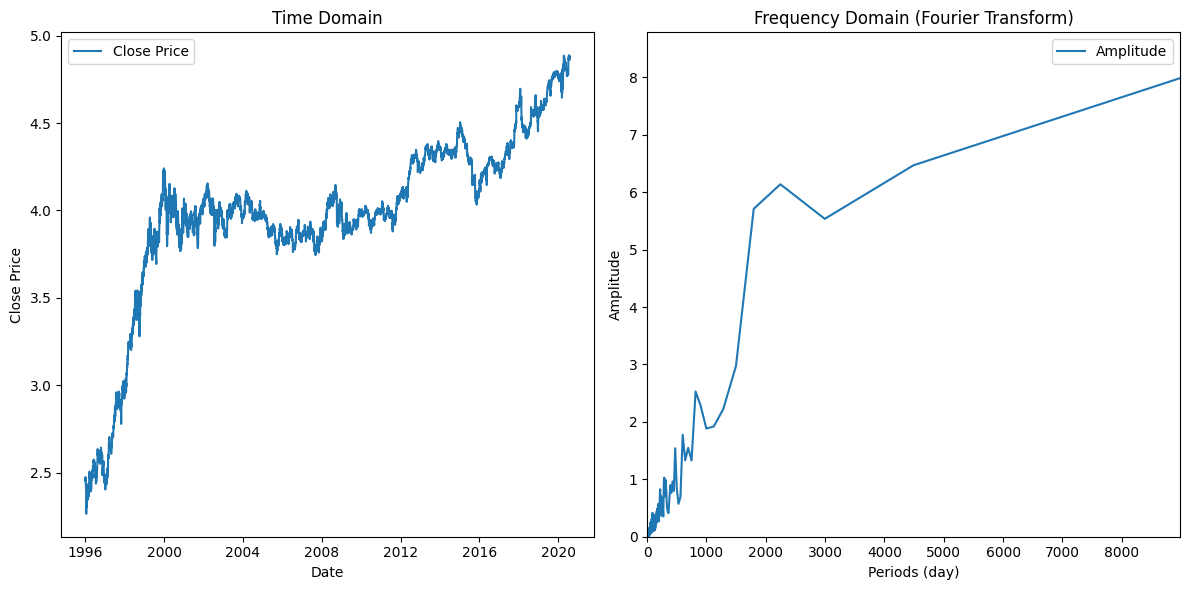

In [162]:
n = log_data.shape[0]
fft_values = np.fft.fft(data_full.Close.values)

frequencies = np.fft.fftfreq(len(fft_values), d=1)

fft_magnitudes = np.abs(fft_values) / n

# Step 5: Plot the results
plt.figure(figsize=(12, 6))

# Time domain plot
plt.subplot(1, 2, 1)
plt.plot(data_full.index.values, log_data, label="Close Price")
#plt.plot(data_full.index.values, nomalized_data.values, label="Close Price")
plt.title("Time Domain")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

# Frequency domain plot
plt.subplot(1, 2, 2)
plt.plot(1/frequencies, fft_magnitudes, label="Amplitude")
plt.xlim(0, max((1/frequencies)[1:]))  # limiting x-axis to view significant periods (ignore large periods)
plt.ylim(0, max(fft_magnitudes[1:]) * 1.1)  # ignore the zero frequency component
plt.title("Frequency Domain (Fourier Transform)")
plt.xlabel("Periods (day)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
data['Price Change'] = data['Close'].diff()
data['Increase'] = data['Price Change'] > 0
increasing_days = data[data['Increase'] == True]
print(increasing_days[['Date', 'Open', 'Close', 'Price Change', 'Volume']])

            Date        Open       Close  Price Change    Volume
1     1999-01-25    1.770833    1.812500      0.171875  12762000
6     1999-02-01    1.583333    1.614583      0.031250   3867600
8     1999-02-03    1.468750    1.520833      0.031250   1878000
9     1999-02-04    1.541667    1.604167      0.083334   4548000
10    1999-02-05    1.630208    1.651042      0.046875   3421200
...          ...         ...         ...           ...       ...
5414  2020-07-29  415.630005  418.619995     10.000000   7112700
5415  2020-07-30  415.000000  424.559998      5.940003   7722000
5416  2020-07-31  422.529999  424.589996      0.029998   9657200
5417  2020-08-03  429.299988  440.410004     15.820008  10318000
5418  2020-08-04  442.000000  449.109985      8.699981   7745800

[2768 rows x 5 columns]
